  **WSC ASSIGNMENT 4 COVID19 Analysis**
 
 >Creator:

 >Pritish Naik
 
 >MTech 1st year
 
 >NITK Surathkal


Import the dataset of COVID19 containing patient details 


In [0]:
import networkx as nx
import matplotlib.pylab as plt
G1 = nx.read_edgelist('COVID19_excel_nodes-Centrality-txt.txt',create_using=nx.DiGraph(),nodetype=int)

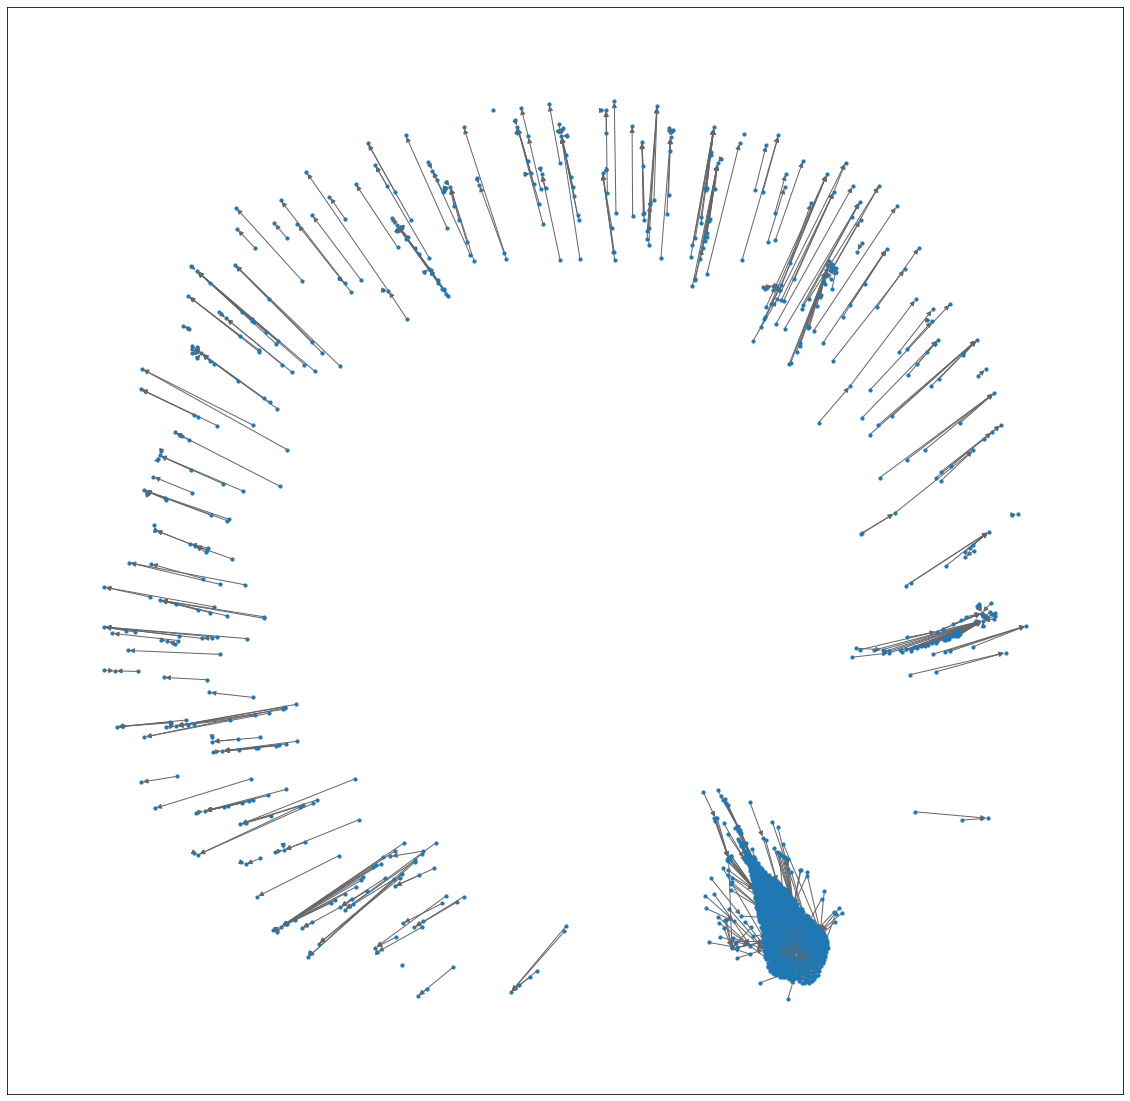

In [0]:
# draw the graph using the default spring layout
plt.figure(figsize=(20,20))
pos = nx.spring_layout(G1)
nx.draw_networkx(G1,pos,with_labels=False,node_size=10,scale=10, edge_color='0.4')

In [0]:
import networkx as nx
import matplotlib.pylab as plt
G2 = nx.read_edgelist('COVID19_excel_nodes-Centrality-txt.txt',create_using=nx.Graph(),nodetype=int)

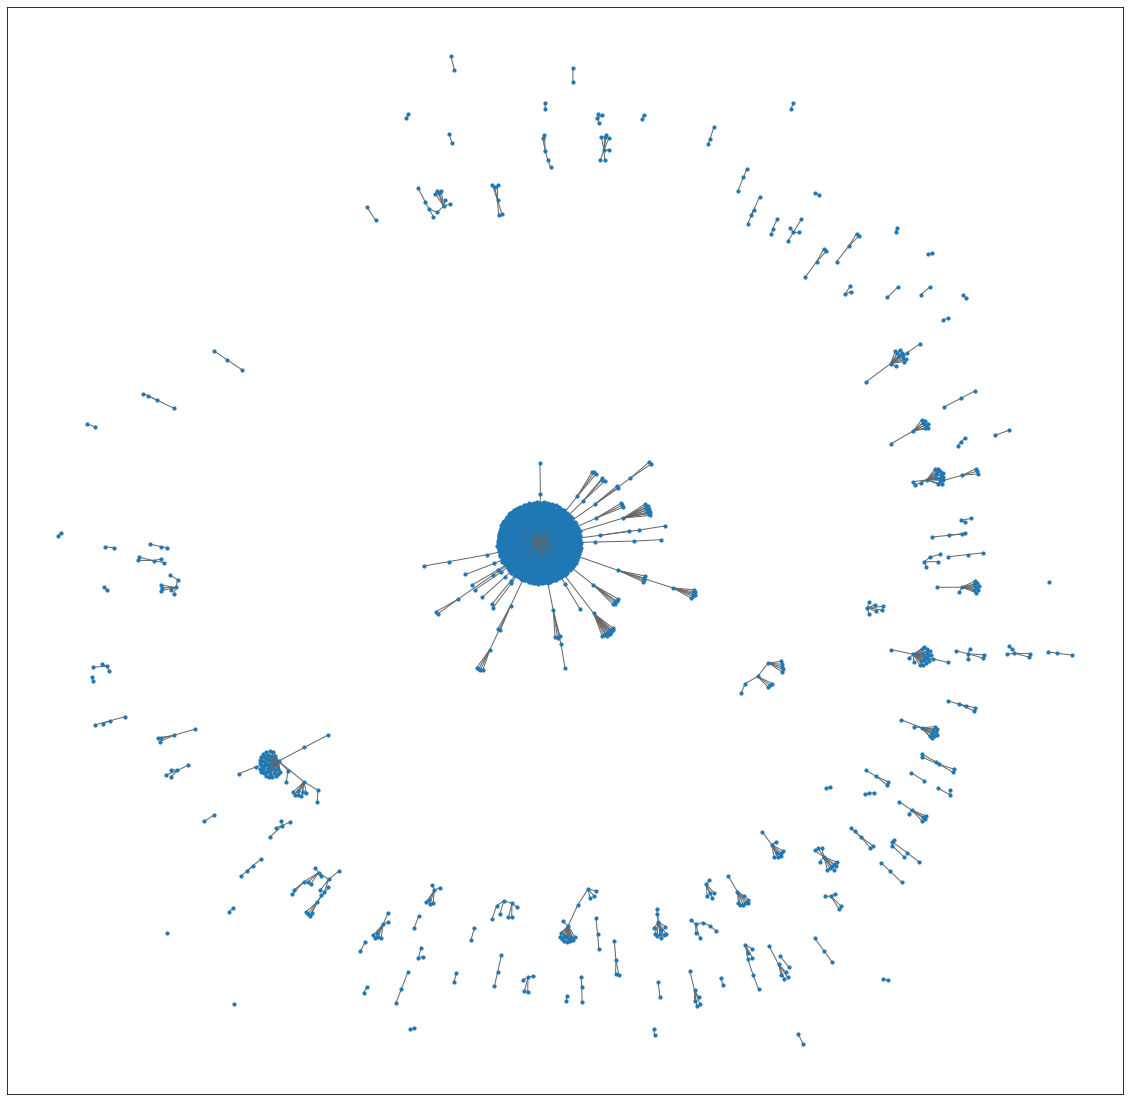

In [0]:
plt.figure(figsize=(20,20))
pos = nx.spring_layout(G2)
nx.draw_networkx(G2,pos,with_labels=False,node_size=10,scale=10, edge_color='0.4')

Calculate number of Patients who infected other patients (nodes) and the spread of infections (Edges)

In [0]:
def Calculate_nodes_and_edges():
    print(f'#Nodes = {len(G1.nodes())} and #Edges = {len(G1.edges())}')
    return len(G1.nodes()), len(G1.edges())
Calculate_nodes_and_edges()

#Nodes = 1642 and #Edges = 1524


(1642, 1524)

The CoVID graph is very sparse. There is a subgraph in the centre of the graph(Giant component). Lets find out number of patients in the giant component

In [0]:
Gcc = sorted(nx.connected_components(G2), key=len, reverse=True)
G_wccs = G2.subgraph(Gcc[0])
print(f'#Nodes = {len(G_wccs.nodes())} and #Edges = {len(G_wccs.edges())}')

#Nodes = 1040 and #Edges = 1039


Giant Component Plot

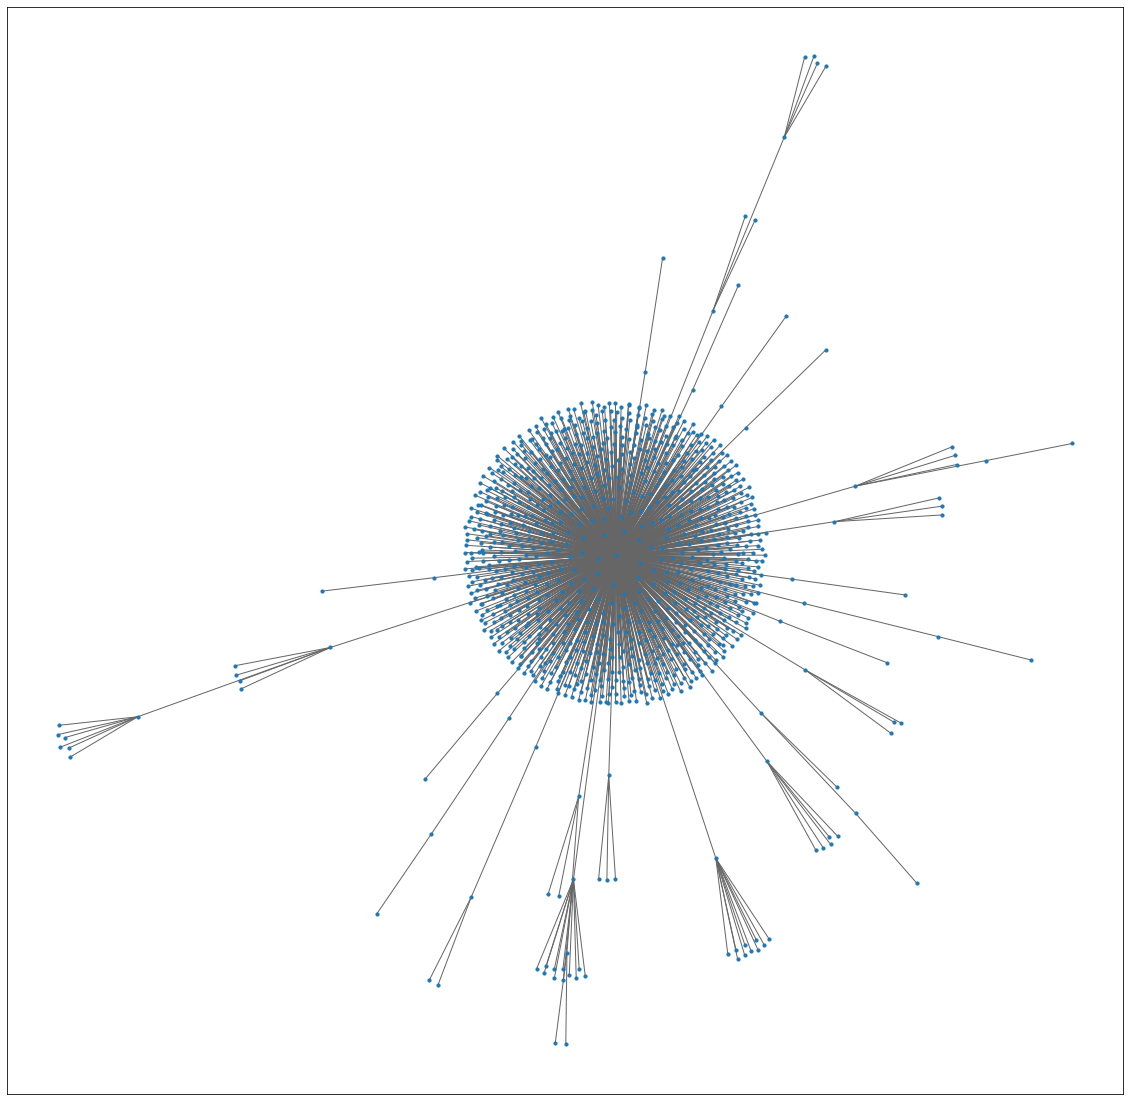

In [0]:
plt.figure(figsize=(20,20))
pos = nx.spring_layout(G_wccs)
nx.draw_networkx(G_wccs,pos,with_labels=False,node_size=10,scale=10, edge_color='0.4')

In [0]:
pathlengths = []
for v in G_wccs.nodes():
    spl = dict(nx.single_source_shortest_path_length(G_wccs, v))
    #print('{} {} '.format(v, spl))
    for p in spl:
        pathlengths.append(spl[p])

print('')
print("average shortest path length %s" % (sum(pathlengths) / len(pathlengths)))

dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1

print('')
print("length : #paths")
for x,y in dist.items():
  print(f'{x}      : {y}')
verts = dist.keys()
#for d in sorted(verts):
#    print('%s %d' % (d, dist[d]))
print('')
print("radius: %d" % nx.radius(G_wccs))
print("diameter: %d" % nx.diameter(G_wccs))
print("eccentricity: %s" % nx.eccentricity(G_wccs))
print("center: %s" % nx.center(G_wccs))
print("periphery: %s" % nx.periphery(G_wccs))
print("density: %s" % nx.density(G_wccs))


average shortest path length 2.1850813609467457

length : #paths
0      : 1040
1      : 2078
2      : 917298
3      : 120698
4      : 38074
5      : 2152
6      : 260

radius: 3
diameter: 6
eccentricity: {141: 4, 900000: 3, 163: 4, 164: 4, 165: 4, 166: 4, 167: 4, 168: 4, 169: 4, 251: 4, 252: 4, 436: 5, 531: 4, 604: 5, 605: 5, 606: 5, 607: 5, 721: 5, 758: 4, 783: 4, 784: 4, 857: 4, 882: 5, 925: 5, 926: 5, 927: 5, 928: 5, 956: 4, 957: 4, 1122: 4, 1123: 4, 1124: 4, 1125: 4, 1126: 4, 1127: 4, 1172: 4, 1173: 4, 1211: 5, 1282: 4, 1283: 4, 1284: 4, 1285: 4, 1286: 4, 1287: 4, 1288: 4, 1289: 4, 1290: 4, 1291: 4, 1292: 4, 1293: 4, 1294: 4, 1295: 4, 1296: 4, 1297: 4, 1298: 4, 1299: 4, 1404: 4, 1405: 5, 1406: 4, 1407: 4, 1409: 4, 1410: 4, 1411: 4, 1412: 4, 1413: 4, 1414: 4, 1415: 4, 1416: 4, 1500: 4, 1501: 4, 1507: 5, 1508: 5, 1509: 5, 1516: 4, 1517: 4, 1518: 4, 1519: 4, 1520: 4, 1521: 4, 1522: 4, 1523: 4, 1524: 4, 1525: 4, 1526: 4, 1527: 4, 1528: 4, 1529: 4, 1530: 4, 1531: 4, 1532: 4, 1533: 4, 1

**Centre** 

Event 90000 is the Tablighi Zamaat Event that took place in Nizamuddin is the super spreader  

**Radius**

Radius = 3
virus can be infected in 3 successions i.e
if A gets infected then
A -> B -> C -> D

**Periphery**


Periphery patients are the ones who infected  from Tablighi Zamaat event and farthest for source. 
Periphery can tell us the patients who got infected indirectly from Tablighi Event  didnt infect others. So they broke the chain of infection.   

Another interesting insight which is debatable is that there are 10 Female patients P6832, P6835, P9262, P9263, P12565, P12568, P12569, P12570, P12571, P12572 who were successful in breaking the chain of infection whereas there are 7 male patients (P12566,P12567, P12581, P12582, P12583, P12584, P14699, P14701) who were successful 
in breaking chain of infection. So based on data we can say that women may be better in containing coronavirus in themselves as compared to men







**Centrality Measure overview**






Centrality calculation of COVID19

In [0]:
def centrality_calculation():
    dc = nx.degree_centrality(G1)
    cc = nx.closeness_centrality(G1)
    bc = nx.betweenness_centrality(G1, endpoints=False, normalized=True)
#    ec = nx.eigenvector_centrality(G1)
    return dc, cc, bc

Centrality calculation of giant component

In [0]:
def centrality_calculation_giant_component():
    dc = nx.degree_centrality(G_wccs)
    cc = nx.closeness_centrality(G_wccs)
    bc = nx.betweenness_centrality(G_wccs, endpoints=False, normalized=True)
#    ec = nx.eigenvector_centrality(G_wccs)
    return dc, cc, bc

**Degree Centrality:**

Here the assumption is that important(interesting) nodes have many connections. This is most basic type of centrality measure where we count the neighbours that are directly connected to the node. This analysis will tell us about the COVID patients who were able to infect patients directly. (Directed spreaders)


Mainly used in calculation of R0 – Reproduction rate of virus

Degree centrality of COVID19 graph

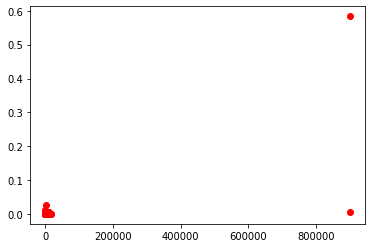

In [0]:
import operator
a,b,c = centrality_calculation()
lists = sorted(a.items())
x, y = zip(*lists)
plt.plot(x, y,'ro')
plt.show()

In [0]:
top5 = sorted(a.items(), key=operator.itemgetter(1), reverse=True)[0:5]
print(top5)

[(900000, 0.5837903717245583), (689, 0.025594149908592323), (182, 0.01218769043266301), (6, 0.009750152346130409), (301, 0.008531383302864107)]


According to degree centrality, following are the rankings of super spreader of corona virus:

>Rank 1: P90000 – (Pls note: P90000 number is given by me, in dataset, the Name of this event is E0)
>>This refers to Tablighi Zamaat event happened in Nazamuddin. As we don’t know the exact patient, the event is measured as one entity

>Rank 2: P689
>>P689 was 70 years old Female from Chikkaballapura Hospitalized on 26-03-2020.The case was registered in Karnataka India.She Travelled from Mecca, Saudi Arabia, details awaited. Infected 42 others

>Rank 3: Patient no 182
>>P182 was 70 years old Male from Punjab Hospitalized on 19-03-2020.The case was registered in Punjab India. He travelled from Germany via Italy. Infected 20 others

>Rank 4:Patient no 6 
>>Patient no 6 is 69 years old Italian tourist who was infected in Rajasthan. Infected 16 others who were of 55 age.

>Rank 5: Patient no 301 
>>Patient no 301 is 69 years old who travelled from Thailand. Infected 14 others.

Degree Centrality of Giant Tablighi Component 

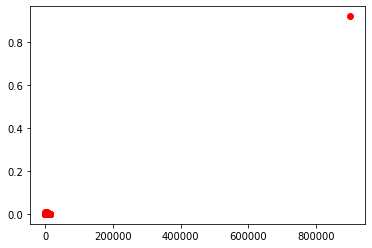

In [0]:
import operator
h,i,j = centrality_calculation_giant_component()
lists = sorted(h.items())
x, y = zip(*lists)
plt.plot(x, y,'ro')
plt.show()

In [0]:
top5 = sorted(a.items(), key=operator.itemgetter(1), reverse=True)[0:5]
print(top5)

[(900000, 0.9220404234841194), (4862, 0.01154956689124158), (531, 0.010587102983638115), (8463, 0.0067372473532242546), (2891, 0.00577478344562079)]


According to degree centrality, following are the ranks of node as per their importance: 

>Rank 1: The Tablighi Zamaat event 

>Rank 2: Patient no. 4862

>>This 50-year-old patient was in direct contact with Tablighi zamaat event and infected 11 others 

>Rank 3: Patient no. 531 

>>This patient is from MP was in direct contact with Tablighi zamaat event and infected 10 others 

>Rank 4: Patient no. 8463 

>>This 55-year-old patient was in direct contact with Tablighi zamaat event from Belagavi infected 6 others 

>Rank 5: Patient no. 2891 

>>This 20-year-old patient was in direct contact with Tablighi zamaat event from Belagavi infected 5 others

**Closeness Centrality:**

>Here, we assume important nodes are close to other nodes in the Network. In other words, closeness centrality says that nodes who are central are a short distance away from all the other nodes in the network. In out COVID19 context, the closeness centrality talks about indirect spreaders

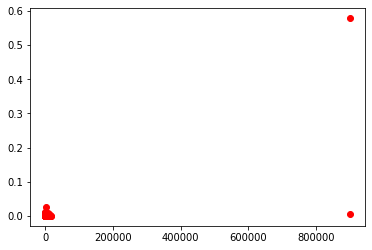

In [0]:
lists = sorted(b.items())
x, y = zip(*lists)
plt.plot(x, y,'ro')
plt.show()

In [0]:
top5 = sorted(b.items(), key=operator.itemgetter(1), reverse=True)[0:5]
print(top5)

[(900000, 0.5780697611405451), (689, 0.026521869628093536), (182, 0.012215389729100882), (6, 0.009750152346130409), (301, 0.00789762340036563)]


According to Closeness centrality, following are the ranks of node as per their importance

>Rank 1: Tablidgi Zamaat event

>Rank 2: P689

>>P689	was **70 years old** Female	from Chikkaballapura Hospitalized on	26-03-2020.The case was registered in	Karnataka	India.She Travelled from Mecca, Saudi Arabia, details awaited. Infected 42 others

>Rank 3: P182

>>P182	was **70 years old** Male	from Punjab Hospitalized on	19-03-2020.The case was registered in	Punjab India. He travelled from Germany via Italy. Infected 20 others

>Rank 4: P6

>>Patient no 6 is **69 years old** Italian tourist who was infected in Rajasthan. Infected 16 others who were of 55 age. 

>Rank 5: P301

>>Patient no 301 is **69 years old** who traveled from Thailand. Infected 14 others.


**Interesting insight**

>Excluding Tablighi zamaat event, All the patients who are ranked high in closeness centrality have age 69/70. This might mean old age patients are infecting to people are close to them or few hops away from them.

**Betweenness Centrality:**

>Here the assumption is that important nodes are the ones who connect other nodes in the network. The metric used to calculate betweenness centrality is distance. Distance between two nodes is the shortest path between them. This measure Talks about how corona virus infected people from one city to another city. Betweeness centrality will help the government to study how COVID19 managed to spread across country even though strict lockdown was imposed. 

>Betweenness centrality also talks whether the officials were successful in quarantining people who were in contact with COVID19 positive patient.


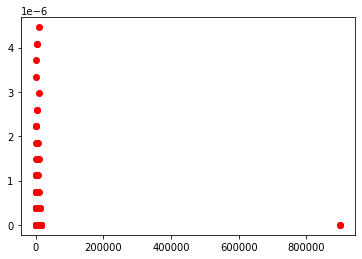

In [0]:
lists = sorted(c.items())
x, y = zip(*lists)
plt.plot(x, y,'ro')
plt.show()

In [0]:
top5 = sorted(c.items(), key=operator.itemgetter(1), reverse=True)[0:5]
print(top5)

[(8463, 4.458911133901101e-06), (2892, 4.087335206076009e-06), (4862, 4.087335206076009e-06), (531, 3.7157592782509178e-06), (1215, 3.344183350425826e-06)]


According to Betweenness centrality, following are the ranks of node as per their importance.

>Rank 1: P8463
>>This is 55-year-old patient from Belagavi. This patent got infected from the patient below P2862 (Rank 2 ) who is from Orissa.

>Rank 2: P2892
>>This patient is from Orissa was infected people directly/indirectly two states which are far from each other .i.e in Belagavi in Karnataka and Korda district in Orissa.

>Rank 3: P4862
>>This patient had attended Tablighi Zamaat and infected 11 others in Bengaluru city.

>Rank 4: P531
>>This patient is from Natipora district Srinagar J&K . Responsible to infect 8 people in Bandipora and 2 in Rajouri district. Interesting point about this patient is, he has high
degree and Betweenness centrality but low closeness centrality. So, we can say this patient has spread virus indirectly. i.e quarantining of people who were COVID19 positive

>Rank 5: P1215

>>This patient is from Meerut Uttar Pradesh. He has spread COVID in his city and infected 8 others in Mysuru Karnataka district

**Interesting insight:**
>(Rank 1) P8463 hails from Hirebagewadi has been in contact with (Rank 2) P2862 from Belagavi who was COVID19 positive. P8463 went back to his city and infected people in his city. That’s the reason why they have high betweenness centrality. So betweenness centrality takes about how COVID spreads inter-cities.

Now that we have seen a number of different ways of finding central nodes in a network,lets compare the different centrality measures,and see how nodes are ranked differently. 

Check for the following image that sumarises the ranks.
[link text](https://drive.google.com/file/d/1x1Cukq0Dp4xbDS2-EbP_0yVKvmaaerzW/view?usp=sharing)

